### Work in Progress: Last Updated 05/14/2023

# The Legend of Yoshida : An Analysis of Masataka Yoshida's First 27 Games in Boston
 Mastaka Yoshida was signed by the Boston Red Sox this past off-season on a 5 year 90 million dollar contract from Japan. Considered an overpay by many, Yoshida began putting his name on the world map by playing for Team Japan in this year's World Baseball Classic, finishing the tournament as a champion and arguably their best player. This created quite a bit of excitement for Red Sox nation and after a slow 13 game start, Yoshida caught fire and went on a 14 game hitting streak. This analysis serves to take a look at how Yoshida improved over those 14 games and what changes he may have made to make those improvements.

In [140]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
#Reading CSV, data sourced from Baseball Reference
df = pd.read_csv("/Users/matt-eisenhauer/Desktop/Local/Sports Data/Yoshida/yoshida_23")

In [48]:
# Get size of dataframe (32 rows x 40 columns)
df.shape

(32, 40)

In [83]:
# See all columns of dataframe and view last 5 rows
pd.set_option('display.max_columns', None)
df.tail()

,Rk,Gcar,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos
27,28.0,28.0,34,05/05/23,BOS,PHI,W5-3,GS-9,5,4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.315,0.400,0.537,0.937,2.0,0.91,0.032,0.81,0.02%,0.45,7,9.2,LF
28,29.0,29.0,36 (1),05/07/23,BOS,PHI,L1-6,CG,4,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.321,0.403,0.536,0.939,2.0,0.71,0.005,0.67,0.00%,-0.09,6,6.0,DH
29,30.0,30.0,37,05/09/23,BOS,ATL,L3-9,CG,5,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.308,0.388,0.513,0.901,2.0,0.35,-0.053,0.32,-0.03%,-1.34,0,0.0,LF
30,31.0,31.0,38,05/10/23,BOS,ATL,W5-2,CG,4,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0.298,0.377,0.496,0.873,4.0,1.22,-0.130,1.06,-0.07%,-1.34,0,0.0,DH
31,NaN,NaN,NaN,NaN,NaN,NaN,18-13,NaN,138,121,22,36,6,0,6,24,13,0,14,3,0,1,4,4,2,0,0.298,0.377,0.496,0.873,NaN,1.05,0.346,0.93,0.20%,9.55,296,394.4,NaN


We can begin cleaning up our data. We have no use for the 'Unnamed' column as it is only representing the '@' symbol for opponent. We'll get rid of that below.

In [173]:
df.columns[5]
df.drop(df.columns[5], axis=1, inplace=True)
df

,Rk,Gcar,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos
0,1.0,1.0,1,03/30/23,BOS,BAL,L9-10,CG,5,4,1,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.500,0.600,0.500,1.100,4.0,1.49,0.034,1.46,0.02%,2.56,12,15.7,LF
1,2.0,2.0,2,04/01/23,BOS,BAL,W9-8,GS-9,5,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.222,0.300,0.222,0.522,4.0,1.55,-0.129,1.42,-0.07%,-1.35,0,0.0,LF
2,3.0,3.0,3,04/02/23,BOS,BAL,W9-5,CG,5,4,3,2,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0.308,0.400,0.308,0.708,4.0,0.97,0.146,0.94,0.09%,1.71,23,31.6,DH
3,4.0,4.0,4,04/03/23,BOS,PIT,L6-7,CG,5,4,1,1,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0.294,0.400,0.471,0.871,4.0,1.99,0.062,1.82,0.03%,1.00,18,25.2,LF
4,5.0,5.0,5,04/04/23,BOS,PIT,L1-4,CG,4,4,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0.238,0.333,0.381,0.714,4.0,1.18,0.087,1.00,0.04%,0.62,2,3.5,LF
5,6.0,6.0,6,04/05/23,BOS,PIT,L1-4,CG,4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.200,0.286,0.320,0.606,4.0,0.99,-0.140,0.83,-0.07%,-1.35,0,0.0,LF
6,7.0,7.0,7,04/06/23,BOS,DET,W6-3,CG,4,3,1,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0.250,0.344,0.393,0.737,4.0,1.61,-0.020,1.35,-0.01%,0.48,17,21.2,LF
7,8.0,8.0,8,04/08/23,BOS,DET,W14-5,CG,5,2,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0.233,0.378,0.367,0.745,4.0,0.24,0.046,0.21,0.02%,0.68,10,15.4,DH
8,9.0,9.0,10 (1),04/10/23,BOS,TBR,L0-1,CG,4,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.235,0.366,0.353,0.719,4.0,1.14,-0.049,1.19,-0.03%,-0.01,3,3.0,LF
9,10.0,10.0,11,04/11/23,BOS,TBR,L2-7,CG,4,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.216,0.356,0.324,0.680,4.0,0.82,-0.065,0.82,-0.04%,-1.18,2,3.0,LF


We'll need to correct datatypes for specific columns we want to plot as well. The below code will change column datatype to numeric.

In [22]:
#Originally encountered an error in plotting so need to convert datatypes to numeric
#Converting both Gcar and Gtm to numeric, however will use Gcar in plotting. 
df['Gcar'] = pd.to_numeric(df['Gcar'], errors='coerce')
df['Gtm'] = pd.to_numeric(df['Gtm'], errors='coerce')
df['BA'] = pd.to_numeric(df['BA'], errors='coerce')
df['OPS'] = pd.to_numeric(df['OPS'], errors='coerce')

In [21]:
# Checking to see where Yoshida's Hit Streak started (Game 13 through 28)
df.loc[:, ['Gcar', 'H']]

,Gcar,H
0,1.0,2
1,2.0,0
2,3.0,2
3,4.0,1
4,5.0,0
5,6.0,0
6,7.0,2
7,8.0,0
8,9.0,1
9,10.0,0


We can create a quick plot to show Yoshida's Batting Average and OPS before, during, and after the 14 game hitstreak. Dotted lines represent where the hitstreak started and ended. 

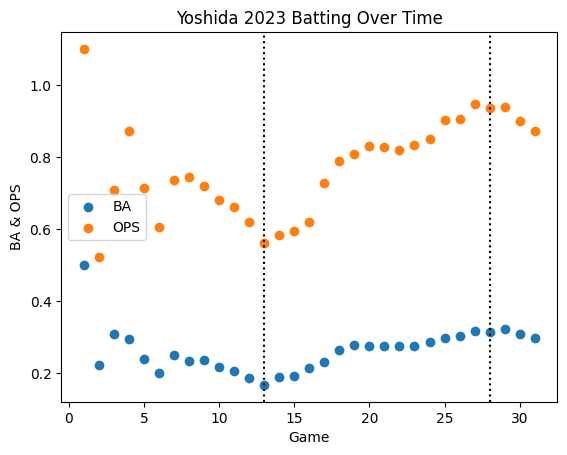

In [33]:
# Defining Scatter Objects
# Plotting Gcar instead of Gtm as Gcar are games that Yoshida appeared in, Gtm is overall games 
plt.scatter(df['Gcar'], df['BA'], label='BA')
plt.scatter(df['Gcar'], df['OPS'], label='OPS')
# Adding Title, labeling axes, creating legend
plt.title('Yoshida 2023 Batting Over Time')
plt.xlabel('Game')
plt.ylabel('BA & OPS')
plt.legend()
# Adding dotted line at y=13 to signify where hitstreak began
start_line = plt.axvline(x=13, linestyle='dotted', color='black')
end_line = plt.axvline(x=28, linestyle='dotted', color='black')
# Display plot
plt.show()

We'll also take a quick look at how his numbers improved over those 14 games. To do this, we'll create two new dataframes, for 12 games to start the season and the follow 14 game hitting streak.

In [77]:
# Creating two separate dataframes to compare before hitstreak and during hitstreak
yoshi_first_12 = df.iloc[:13].copy()
yoshi_next_14 = df.iloc[13:29].copy()
yoshi_next_14.columns

Index(['Rk', 'Gcar', 'Gtm', 'Date', 'Tm', 'Opp', 'Rslt', 'Inngs', 'PA', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF',
       'ROE', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS', 'BOP', 'aLI',
       'WPA', 'acLI', 'cWPA', 'RE24', 'DFS(DK)', 'DFS(FD)', 'Pos'],
      dtype='object')

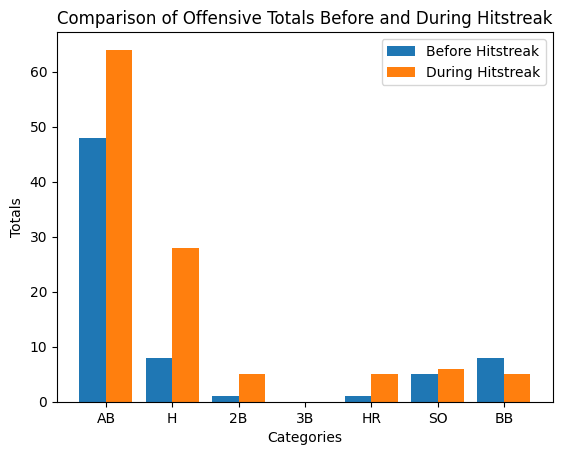

In [78]:
# Setting paramaters to create double bar graph to compare offensive totals for before and during the hitstreak
totals_df1 = yoshi_first_12[['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB']].sum()
totals_df2 = yoshi_next_14[['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB']].sum()

labels = ['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB']
x = range(len(labels))

plt.bar(x, totals_df1, width=0.4, label='Before Hitstreak')
plt.bar([i + 0.4 for i in x], totals_df2, width=0.4, label='During Hitstreak')

plt.xlabel('Categories')
plt.ylabel('Totals')
plt.title('Comparison of Offensive Totals Before and During Hitstreak')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()

plt.show()

Now that we have a look at totals, we want to better understand what Yoshida may have changed in his approach to start that streak. Our first step is to gather data on every pitch Yoshida has seen this year. My initial approach was to scrape this data from Baseball Savant (and I may still do so at a later date, extra practice), but I found a python package called pybaseball which can do this for me. So, to make this exercise a bit easier, we'll install and begin to play around with the package.

In [81]:
#!pip install pybaseball 

In [87]:
from pybaseball import statcast
from pybaseball import  playerid_lookup
from pybaseball import  statcast_batter

In [92]:
# Get Yoshida Player ID
playerid_lookup('yoshida', 'masataka')
yoshi_id = 807799

In [93]:
yoshi_stats = statcast_batter('2023-03-30', '2023-05-07', yoshi_id)

Gathering Player Data


In [95]:
yoshi_stats.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [99]:
yoshi_stats.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2023-05-07,93.9,-1.98,6.70,"Yoshida, Masataka",807799,592836,field_out,hit_into_play,NaN,NaN,NaN,NaN,2,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,X,6.0,fly_ball,2,1,2023,-0.76,1.36,0.21,3.29,NaN,NaN,NaN,1,4,Top,110.22,125.47,NaN,NaN,592663,NaN,NaN,7.271707,-136.454965,-5.991793,-11.155418,31.599119,-14.097215,3.23,1.43,192.0,75.8,55.0,92.6,2173,5.7,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.80,0.100,0.116,0.0,1.0,0.0,0.0,3.0,21,4,4-Seam Fastball,0,0,0,0,0,0,0,0,Strategic,Standard,212,0.019,-0.199
1,SI,2023-05-07,93.3,-2.07,6.62,"Yoshida, Masataka",807799,592836,NaN,called_strike,NaN,NaN,NaN,NaN,11,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,S,NaN,NaN,2,0,2023,-1.42,1.05,-0.85,2.28,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,592663,NaN,NaN,6.199198,-135.575711,-7.626231,-18.871711,29.024159,-17.785746,3.13,1.34,NaN,NaN,NaN,92.6,1996,5.9,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,3,Sinker,0,0,0,0,0,0,0,0,Strategic,Standard,221,0.000,-0.050
2,FS,2023-05-07,89.2,-2.21,6.51,"Yoshida, Masataka",807799,592836,NaN,ball,NaN,NaN,NaN,NaN,14,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,B,NaN,NaN,1,0,2023,-1.49,0.27,0.83,1.09,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,592663,NaN,NaN,10.421618,-129.306712,-7.750706,-18.856027,26.904201,-27.601700,3.20,1.46,NaN,NaN,NaN,87.9,1603,5.7,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2,Split-Finger,0,0,0,0,0,0,0,0,Strategic,Standard,228,0.000,0.047
3,FC,2023-05-07,89.8,-2.12,6.57,"Yoshida, Masataka",807799,592836,NaN,ball,NaN,NaN,NaN,NaN,13,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,B,NaN,NaN,0,0,2023,-0.05,1.29,-0.01,0.97,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,592663,NaN,NaN,5.279526,-130.464323,-10.571318,-1.483760,23.012924,-15.554516,3.23,1.41,NaN,NaN,NaN,89.4,2396,5.8,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1,Cutter,0,0,0,0,0,0,0,0,Strategic,Standard,204,0.000,0.030
4,SI,2023-05-07,93.9,3.48,5.28,"Yoshida, Masataka",807799,621381,field_out,hit_into_play,NaN,NaN,NaN,NaN,14,"Masataka Yoshida grounds out, pitcher Matt Str...",R,L,L,PHI,BOS,X,1.0,ground_ball,3,2,2023,1.64,0.65,0.85,2.00,NaN,NaN,NaN,1,9,Top,127.90,181.22,NaN,NaN,592663,NaN,NaN,-10.399038,-136.330632,-4.145295,22.793241,30.862527,-23.331757,3.23,1.43,5.0,78.9,-22.0,93.4,2434,6.2,718270,621381,592663,664761,681082,543281,624641,656495,669016,592206,54.31,0.043,0.040,0.0,1.0,0.0,0.0,2.0,66,6,Sinker,6,1,1,6,1,6,1,6,Standard,Standard,125,0.002,-0.205


In [110]:
# Re-sorting the dataframe to show event ascending based on game date first, then inning
yoshi_stats = yoshi_stats.sort_values(['game_date', 'inning'], ascending=[True, True])
yoshi_stats.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
486,FF,2023-03-30,93.1,-2.07,6.35,"Yoshida, Masataka",807799,502043,NaN,ball,NaN,NaN,NaN,NaN,11,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,B,NaN,NaN,0,0,2023,-0.81,1.76,-0.16,3.48,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,6.739315,-135.293395,-5.425884,-11.502254,31.301379,-9.623006,3.27,1.58,NaN,NaN,NaN,93.5,2358,6.8,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,4-Seam Fastball,1,1,1,1,1,1,1,1,Standard,Standard,209,0.0,0.021
485,FC,2023-03-30,88.1,-2.50,6.21,"Yoshida, Masataka",807799,502043,NaN,swinging_strike,NaN,NaN,NaN,NaN,9,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,S,NaN,NaN,1,0,2023,0.00,0.74,0.65,1.95,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,7.637858,-127.995266,-5.777490,-1.610961,26.318167,-22.974961,3.26,1.48,NaN,NaN,NaN,88.1,1213,6.4,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,54.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,Cutter,1,1,1,1,1,1,1,1,Standard,Standard,184,0.0,-0.026
484,CH,2023-03-30,85.6,-2.31,6.19,"Yoshida, Masataka",807799,502043,NaN,ball,NaN,NaN,NaN,NaN,14,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,B,NaN,NaN,1,1,2023,-1.64,0.33,1.01,-0.23,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,11.165660,-123.815753,-9.467008,-19.151965,25.719706,-26.914892,3.16,1.35,NaN,NaN,NaN,85.6,1723,6.7,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,Changeup,1,1,1,1,1,1,1,1,Standard,Standard,229,0.0,0.021
483,CH,2023-03-30,84.7,-2.38,6.20,"Yoshida, Masataka",807799,502043,NaN,foul,NaN,NaN,NaN,NaN,9,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,S,NaN,NaN,2,1,2023,-1.42,0.37,0.33,1.68,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,9.237892,-122.895458,-4.922712,-16.301990,25.334326,-27.567414,3.26,1.48,1.0,75.7,-74.0,85.0,1754,6.7,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,4,Changeup,1,1,1,1,1,1,1,1,Standard,Standard,231,0.0,-0.028
482,FC,2023-03-30,89.2,-2.37,6.26,"Yoshida, Masataka",807799,502043,NaN,foul,NaN,NaN,NaN,NaN,3,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,S,NaN,NaN,2,2,2023,0.38,1.05,0.35,3.21,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,5.903073,-129.709583,-3.656842,2.916897,29.335278,-19.750859,3.26,1.48,147.0,57.9,34.0,89.2,2349,6.5,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,5,Cutter,1,1,1,1,1,1,1,1,Standard,Standard,192,0.0,0.000


In [135]:
# Convert 'game_date' column to datetime type and define start and end dates of before and after hitting streak
yoshi_stats['game_date'] = pd.to_datetime(yoshi_stats['game_date'])
# Start of Season
season_start = pd.to_datetime('2023-03-30')
end_date = pd.to_datetime('2023-04-19')
streak_start = pd.to_datetime('2023-04-20')
streak_end = pd.to_datetime('2023-05-07')

yoshi_start =  yoshi_stats[(yoshi_stats['game_date'] >= season_start) & (yoshi_stats['game_date'] <= end_date)].copy()
yoshi_streak = yoshi_stats[(yoshi_stats['game_date'] >= streak_start) & (yoshi_stats['game_date'] <= streak_end)].copy()

In [137]:
start_pitches = yoshi_start.groupby('pitch_type').size()
streak_pitches = yoshi_streak.groupby('pitch_type').size()

pitch_type
CH     44
CU     18
FC     16
FF    103
FS     12
KC      1
SI     32
SL     31
ST      6
SV      2
dtype: int64

In [157]:
start_pitches

,pitch_type,start_count
0,CH,25
1,CU,19
2,FC,23
3,FF,86
4,FS,2
5,KC,1
6,SI,21
7,SL,44
8,ST,4


In trying to graph pitches seen in both dataframes, we run into a value error and realize there is one additional pitch in the streak_pitches DF that is not shown in start pitches. To avoid this in the future we'll write the following code to add any missing pitches to the start_pitches dataframe. The same can be applied to streak_pitches as needed.

In [167]:
start_pitches = yoshi_start.groupby('pitch_type').size().reset_index(name='start_count')
streak_pitches = yoshi_streak.groupby('pitch_type').size().reset_index(name='streak_count')

# Add missing pitch types to start_pitches and set their count to zero
# Identify missing pitch types, in this case only 'SV'
missing_pitch_types = set(streak_pitches['pitch_type']) - set(start_pitches['pitch_type'])

#Loop through missing_pitch_types and add to start_pitches DF 
for pitch_type in missing_pitch_types:
    start_pitches = start_pitches.append({'pitch_type': pitch_type, 'start_count': 0}, ignore_index=True)

# Confirmed both dataframes match now
start_pitches

,pitch_type,start_count
0,CH,25
1,CU,19
2,FC,23
3,FF,86
4,FS,2
5,KC,1
6,SI,21
7,SL,44
8,ST,4
9,SV,0


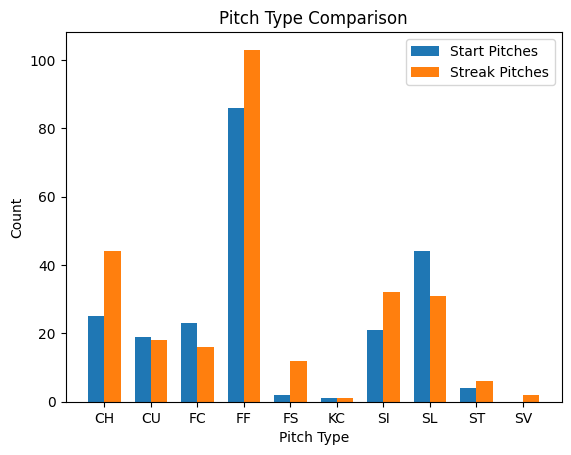

In [171]:
bar_width = .35

x = np.arange(len(start_pitches['pitch_type']))

# Create the bar graph using value x and bar_width to offset bar position. 
plt.bar(x - bar_width/2, start_pitches['start_count'], width=bar_width, label='Start Pitches')
plt.bar(x + bar_width/2, streak_pitches['streak_count'], width=bar_width, label='Streak Pitches')

# Set the x-tick labels
plt.xticks(x, start_pitches['pitch_type'])

# Set the axis labels and title
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.title('Pitch Type Comparison')
plt.legend()

# Display the bar graph
plt.show()

In [ ]:
## TO DO: Plot percentages of pitches seen per total AB to get better frame of reference. 
## Gather and analyze data based on pitch location, pitches taken, pitches swung at, etc.
## Gather launch angle, exit velo data, etc